# How parameter effect the tSNE plot

This notebook is used to demonstrate how different parameters affect the tSNE plot.

It first generates synthetic datasets in circles, s-curve, and uniform grid.

Then it applies t-SNE to visualize them with different perplexity values and shows how the t-SNE plot changes with different parameters.

In [1]:
from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
from sklearn import datasets, manifold

In [2]:
# Set tSNE parameters
n_components = 2 # n_components: The number of dimensions to reduce the data to
perplexities = [5, 30, 50, 100] # perplexity is related to the nearest neighbors. Larger datasets require higher perplexity
random_state = 0 # random_state: Controls the randomness of the initialization and the optimization process
max_iter = 300 # max_iter: Maximum number of iterations for the optimization. Should be at least 250

Note about learning_rate: 
 - In tSNE, The ‘auto’(defaulted) option sets the learning_rate to max(N / early_exaggeration / 4, 50) where N is the sample size.

 - if the cost function gets stuck in a bad local minimum increasing the learning_rate may help. 

 - The learning_rate for t-SNE is usually in the range [10.0, 1000.0]:
   - If it is too high, the data looks like a ‘ball’ with any point approximately equidistant from its nearest neighbours.

   - If it is too low, most points may look compressed in a dense cloud with few outliers.
   
 - Many other t-SNE implementations (bhtsne, FIt-SNE, openTSNE, etc.) use a definition of learning_rate that is 4 times smaller than t-SNE.(In tSNE learning_rate=200 corresponds to learning_rate=800 in those other implementations.)


### Synthetic double-circles dataset for t-SNE

circles, perplexity=5 in 0.1 sec
circles, perplexity=30 in 0.11 sec
circles, perplexity=50 in 0.1 sec
circles, perplexity=100 in 0.11 sec


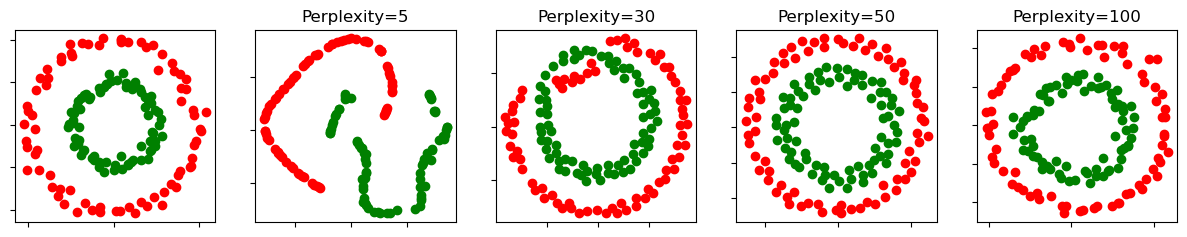

In [3]:
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 2.5)) 

# Generate synthetic dataset in circles
n_samples = 150
X, y = datasets.make_circles(
    n_samples=n_samples,
    factor=0.5,
    noise=0.05,
    random_state=0
    # factor: scale factor between inner and outer circle, [0,1)
    # noise: standard deviation of Gaussian Noise
    # shuffle: change the order of data points present, but affect overall distribution
    # random_state: The seed for random number generator, affecting the exact placement of the point but not overall structure. 
)
# X is a 2D array of shape (n_samples, 2) where each row represents a point in the 2D space.
# y is a 1D array of shape (n_samples,) where each element is the label of the corresponding point in X. The labels are 0 for points in the outer circle and 1 for points in the inner circle.

# Plot the original data points in circles
red = y == 0 
green = y == 1 
ax = subplots[0] 
ax.scatter(X[red, 0], X[red, 1], c="r") 
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Apply t-SNE and plot

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]
    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=random_state,
        perplexity=perplexity, # it typically ranges from 5 to 50, and less than the number of samples
        max_iter=max_iter,  # Maximum number of iterations for the optimization. Should be at least 250
    )
    Y = tsne.fit_transform(X)
    t1 = time()

    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

### Synthetic S-Curve dataset for t-SNE

S-curve, perplexity=5 in 0.1 sec
S-curve, perplexity=30 in 0.099 sec
S-curve, perplexity=50 in 0.1 sec
S-curve, perplexity=100 in 0.11 sec


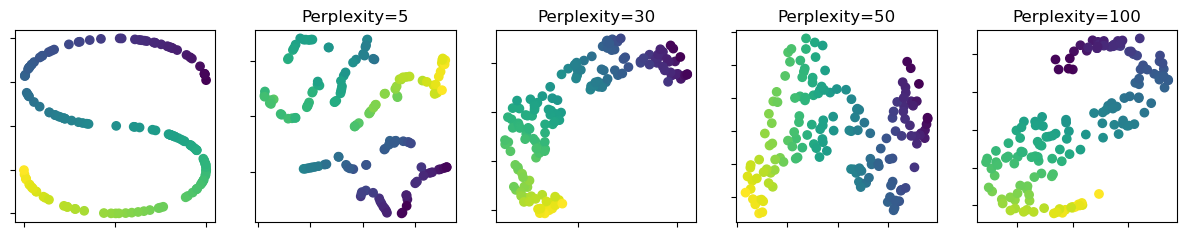

In [4]:
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 2.5))

# generate synthetic dataset in s-curve

X, color = datasets.make_s_curve(n_samples, random_state=0)
ax = subplots[0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

# Apply t-SNE and plot
for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=random_state,
        perplexity=perplexity,
        max_iter=max_iter,
    )
    Y = tsne.fit_transform(X)
    t1 = time()

    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

### Synthetic 2D-Uniform dataset for t-SNE

uniform grid, perplexity=5 in 0.094 sec
uniform grid, perplexity=30 in 0.099 sec
uniform grid, perplexity=50 in 0.1 sec
uniform grid, perplexity=100 in 0.1 sec


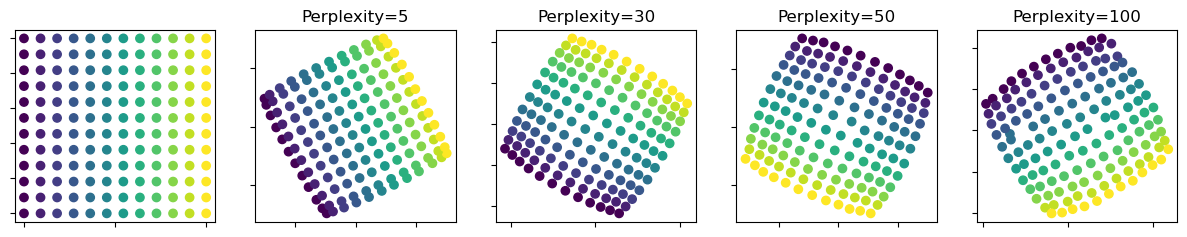

In [5]:
(fig, subplots) = plt.subplots(1, 5, figsize=(15, 2.5))

# generate synthetic dataset in 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

# Apply t-SNE and plot
for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=random_state,
        perplexity=perplexity,
        max_iter=max_iter,
    )
    Y = tsne.fit_transform(X)
    t1 = time()

    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

Authors: The scikit-learn developers

PDX-License-Identifier: BSD-3-Clause

Editor/Annotator: Jiayi Ding


BSD 3-Clause License

Copyright (c) 2007-2024 The scikit-learn developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions are met:

* Redistributions of source code must retain the above copyright notice, this
  list of conditions and the following disclaimer.

* Redistributions in binary form must reproduce the above copyright notice,
  this list of conditions and the following disclaimer in the documentation
  and/or other materials provided with the distribution.

* Neither the name of the copyright holder nor the names of its
  contributors may be used to endorse or promote products derived from
  this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE
IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE
DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE
FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL
DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR
SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER
CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY,
OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE
OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.